In [2]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

uploaded = files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models
from matplotlib import pyplot as plt
from scipy import stats
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Importig required Libaries
from keras.callbacks import TensorBoard
from keras.layers import Activation, Dense, Flatten, Cropping2D, Conv2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Lambda
from keras.models import model_from_json
#from keras.backend import tf as ktf
import csv
import pickle
import cv2
from pandas import DataFrame
import numpy as np
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings("ignore")


# train_datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,
#                                    samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-6, rotation_range=10, width_shift_range=0.2, 
#                                    height_shift_range=0.2,shear_range=0, zoom_range=0.1, channel_shift_range=0., fill_mode='nearest', cval=0., 
#                                    horizontal_flip=False,vertical_flip=False, rescale=None, preprocessing_function=None,  data_format="channels_last")


Saving kaggle.json to kaggle (3).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
# # Downlaod data for the nyc_taxi_trip_duration challenge
# !kaggle datasets download -d fmena14/crowd-counting
# !unzip -qq crowd-counting.zip

In [11]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive1 = GoogleDrive(gauth)


In [16]:
%%time
IMAGE_FILE_ID = "1y0BoU7RIisMgj4PsCPbY02PPm4CEXaEF"
downloaded = drive.CreateFile({'id':IMAGE_FILE_ID})
downloaded.GetContentFile('images.npy')        

CPU times: user 22.7 s, sys: 5.47 s, total: 28.2 s
Wall time: 1min 25s


In [12]:
IMAGE_GT_FILE_ID = "1F8MSiZ974Hta6gZcex9DFvGwbhA2u3s8"
downloaded = drive.CreateFile({'id':IMAGE_GT_FILE_ID})
downloaded.GetContentFile('images_gt.npy') 

In [5]:
IMAGE_DENSITY_FILE_ID = "1-1JXmD6sumzJcATFQzm9Yq7CCDZ2K7cT"
downloaded = drive.CreateFile({'id':IMAGE_DENSITY_FILE_ID})
downloaded.GetContentFile('images_density.npy')

In [6]:
LABEL_FILE_ID = "1NYHK2AcLmm-sHpZWFR5vn_ejxX3KB7Mz"
downloaded = drive.CreateFile({'id':LABEL_FILE_ID})
downloaded.GetContentFile('labels.npy')

In [19]:
img = np.load('images.npy')
images_gt=np.load('images_gt.npy',allow_pickle=True)
images_density=np.load('images_density.npy')
labels=np.load('labels.npy')

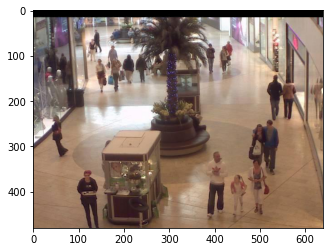

In [9]:
plt.imshow(img[200])

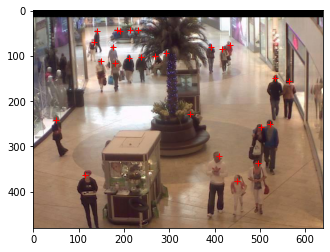

In [17]:
plt.imshow(img[200])
plt.plot(images_gt[200][:,0],images_gt[200][:,1],'r+')

In [10]:
## Model -1 Number of Groups in image Model

In [20]:
%%time

def Preoprocessimage(a, ModeofImage):
  #a[np.abs(a[:,:,0]-m[:,:,0])<10] = 255
  a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255
  kernel = np.ones((2,2),np.uint8)
  b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
  b = cv2.GaussianBlur(b,(3,3),0)
  return b


# Checking the mode values for each frame of image to remove background
ModeofImage = stats.mode(img[:10])[0][0]

# Applying background removal  preprocessing to each individual image
PreprocessedImages = []
for image in img:
  PreprocessedImages.append(Preoprocessimage(image.copy(), ModeofImage)[np.newaxis])
img1 = np.concatenate(PreprocessedImages)


labels = np.array([len(i) for i in images_gt])

# Splitting data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(img1, labels, test_size=0.2, random_state=43)
print(x_train.shape[0])
print(x_test.shape[0])


# !mkdir train_data
# !mkdir test_data

# for i in range(len(x_train)):
#   cv2.imwrite('train_data/train-image-{}.jpg'.format(str(i)),x_train[i])
# for i in range(len(x_test)):
#   cv2.imwrite('test_data/test_image-{}.jpg'.format(str(i)), x_test[i])

# with open('PreprocessImages.npy', 'wb') as f:
#     np.save(f, img1)
# with open('ModeOfImage.npy', 'wb') as f:
#     np.save(f, ModeofImage)

1600
400
CPU times: user 55.9 s, sys: 4.1 s, total: 60 s
Wall time: 1min 11s


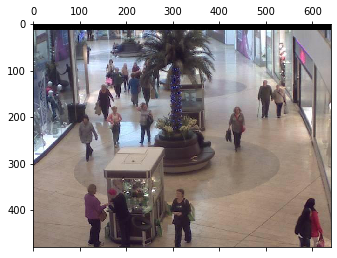

In [ ]:
a = img[13].copy()
plt.matshow(a, cmap='viridis')

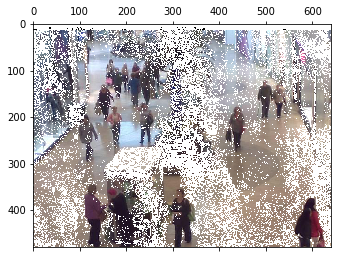

In [ ]:
dimension = 2
a = img[13].copy()
a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255

plt.matshow(a, cmap='viridis')

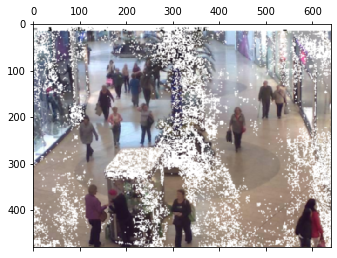

In [ ]:
kernel = np.ones((2,2),np.uint8)
b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
b = cv2.GaussianBlur(b,(5,5),0)
plt.matshow(b, cmap='viridis')

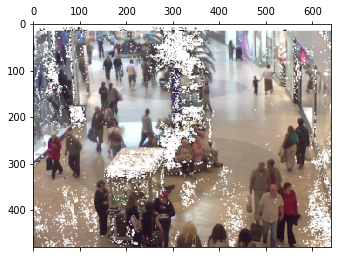

In [ ]:
plt.matshow(x_train[np.random.randint(1000)], cmap='viridis')

In [ ]:
def Pattern_Recognion_Model_API(X_train,y_train):
    '''
    Pattern Recognition model with the use Functional API method consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''

    X_input = Input(shape=X_train.shape, name='img_in')
    #X =  Cropping2D(cropping=((70, 25), (0, 0)))(X_input)
    #X = Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))(X)
    X = Lambda(lambda x: (x / 255.0) - 0.5)(X_input)
    X = Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=6, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)

    X = Activation('relu')(X)
    # X = Conv2D(filters=6, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
    #                  kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    # X = Activation('relu')(X)
    X = Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=32,kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    # Fully connected
    X = Flatten()(X)
    # model.add(Dropout(0.35))
    X = Dense(units=1164)(X)
    X = Activation('relu')(X)
    X = Dense(units=100)(X)
    X = Activation('relu')(X)
    X = Dense(units=50)(X)
    X = Activation('relu')(X)
    X = Dense(units=10)(X)
    X = Activation('relu')(X)
    X = Dense(units=1)(X)
    model=Model(inputs=X_input, outputs=X, name='Convolve')
    model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])
    return model




def PatternRecognitionModel(input_shape):
    '''
    Pattern Recognition model consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''
    # Model
    model = Sequential()
# Convolutional
    model.add(Cropping2D(cropping=((5, 5), (0, 0)), input_shape=input_shape))
#     Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))
    model.add(Lambda(lambda x: (x / 255.0) - 0.5))
    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1),use_bias=True, 
                     kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation('relu'))
    # Fully connected
    model.add(Flatten())
    model.add(Dense(units=1164))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=50))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mae'])
    return model

# Initializing the Convolutional model
model = PatternRecognitionModel(x_train[0].shape)

#model = PatternRecognitionModel_API(x_train[0].shape)
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 470, 640, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 470, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 233, 318, 3)       228       
_________________________________________________________________
activation (Activation)      (None, 233, 318, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 115, 157, 3)       228       
_________________________________________________________________
activation_1 (Activation)    (None, 115, 157, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 78, 8)         2

In [ ]:
# Hyper parameters considered for model
batch_size = 10
epochs = 100
#Training  the model
model.fit(x_train, y_train, steps_per_epoch=int(np.ceil(len(x_train) / float(batch_size))), epochs=epochs, workers=4,
                    verbose=1, validation_data=(x_test, y_test), validation_steps=int(np.ceil(len(x_test) / float(batch_size))))

Epoch 1/100
160/160 [==============================] - 2s 15ms/step - loss: 123.5598 - mae: 8.2096 - val_loss: 28.5334 - val_mae: 4.3291
Epoch 2/100
160/160 [==============================] - 2s 13ms/step - loss: 27.0490 - mae: 4.1373 - val_loss: 16.9587 - val_mae: 3.2465
Epoch 3/100
160/160 [==============================] - 2s 14ms/step - loss: 19.7432 - mae: 3.5081 - val_loss: 17.5320 - val_mae: 3.2513
Epoch 4/100
160/160 [==============================] - 2s 13ms/step - loss: 14.7334 - mae: 3.0261 - val_loss: 12.7178 - val_mae: 2.9032
Epoch 5/100
160/160 [==============================] - 2s 13ms/step - loss: 13.3285 - mae: 2.8880 - val_loss: 11.3468 - val_mae: 2.7385
Epoch 6/100
160/160 [==============================] - 2s 13ms/step - loss: 15.0764 - mae: 3.0882 - val_loss: 13.3074 - val_mae: 2.8755
Epoch 7/100
160/160 [==============================] - 2s 13ms/step - loss: 11.4365 - mae: 2.6510 - val_loss: 14.0111 - val_mae: 3.1100
Epoch 8/100
160/160 [==========================

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

# # serialize model to JSON
# model_json = model.to_json()
# with open("drive/My Drive/project/CrowdCounting/model1.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("drive/My Drive/project/CrowdCounting/model1.h5")
# print("Saved model to disk")
 
# with open('drive/My Drive/project/CrowdCounting/ModeOfImage.npy', 'wb') as f:
#    np.save(f, ModeofImage)


 # load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
GroupModel = model_from_json(loaded_model_json)
# load weights into new model
GroupModel.load_weights("drive/My Drive/project/CrowdCounting/model1.h5")
print("Loaded model from disk")
 
ModeofImage = np.load(('drive/My Drive/project/CrowdCounting/ModeOfImage.npy')

Loaded model from disk


### First model prediction Outputs for images ( Without background removal)

In [24]:

layer_outputs = [layer.output for layer in model.layers[:15]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [25]:
rvalue = np.random.randint(2000)
array = img[rvalue][None,:]
a = activation_model.predict(array)

model.predict(array)

array([[33.172142]], dtype=float32)

In [26]:
label_df['people'][rvalue]

31

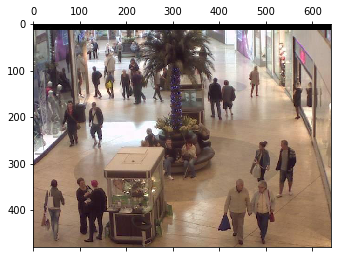

In [27]:
plt.matshow(array[0], cmap='viridis')

(1, 233, 318, 16)


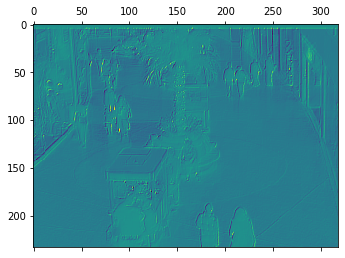

In [ ]:
first_layer_activation = a[2]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

(1, 470, 640, 3)


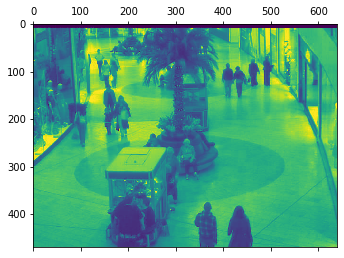

In [ ]:
first_layer_activation = a[0]
print(first_layer_activation.shape)
j +=1
j=0
plt.matshow(first_layer_activation[0, :, :, j], cmap='viridis')

(1, 233, 318, 16)


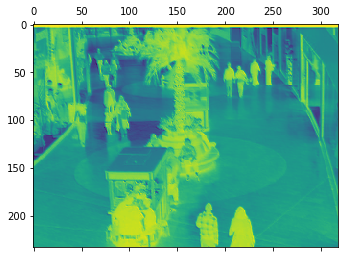

In [ ]:
first_layer_activation = a[2]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

In [ ]:
img[0][None,:].shape

(1, 480, 640, 3)

### Model output After Background removal processing of images

In [143]:
from shapely.geometry import Point
from shapely import geometry

def AreaOfContour(x):
    return x[2]*x[3]

def FilterContours(cordinates):
    # Creating the Numpy array of filtered Contour Coordinates
    ContourInfo = np.array(cordinates)
    # Finding the Area of each contour and concatenating the area to axis of numpy array
    ContourAreas = np.apply_along_axis(AreaOfContour,1,ContourInfo)[:,None]
    ContourInfo = np.concatenate([ContourInfo,ContourAreas],axis=1)
    # Sorting the Contours based on the Area of contours
    ContourInfo = ContourInfo[ContourInfo[:,4].argsort()[::-1]]
    # Adding Flag of Table boundary to Contoursa
    ContourInfo = np.concatenate([ContourInfo,np.zeros(len(ContourInfo)).astype(int)[:,None]],axis=1)


    count = 0

    # Filtering the Inner Bounded Contours from Tables by looping the through the Contours sorted by Area,
    # All contours will be checked with the First level area contours if it fits inside, which ever iside of it, will be Deleted from that.
    while (len(ContourInfo) !=  ContourInfo[:,5].sum()):
        # Picking First level of Contour from Area
        ContourInfo[count][-1] = 1
        Cont1 = ContourInfo[count]
        x,y,w,h = Cont1[0],Cont1[1],Cont1[2],Cont1[3]
        polygon = geometry.polygon.Polygon([(x,y),(x,y+h),(x+w,y+h),(x+w,y)])

        InnerContours = []
        # Checking the Each contour one by one till it reaches to Low level and appending the rows of contours inside of it
        for val,Cont2 in enumerate(ContourInfo[count+1:]):
            #Cont2 = ContourInfo[1]
            X,Y,W,H = Cont2[0],Cont2[1],Cont2[2],Cont2[3]
            if any([polygon.contains(Point(point)) for point in [(X,Y),(X,Y+H),(X+W,Y+H),(X+W,Y)]]):
                other_polygon = geometry.polygon.Polygon([(X,Y),(X,Y+H),(X+W,Y+H),(X+W,Y)])
                if polygon.intersection(other_polygon).area/other_polygon.area > 0.45:
                    InnerContours.append(val+count+1)
        # Deleting the Contours which are inside of it.
        ContourInfo = np.delete(ContourInfo,InnerContours, axis=0)
        count +=1
    return ContourInfo    


def PreprocessEmbeddings(n):
  m = n.copy()
  m  = (m.max()-m)*(255/m.max())
  m = np.dstack([m,m,m])
  return m
def ApplyContours(image, kernel_size=3, thickness=1, iterations = 11):
  #im = np.dstack([image,image,image])
  im = PreprocessEmbeddings(image)
  im1 = image.copy()

  # kernel = np.ones((kernel_size, kernel_size),np.uint8)
  # dilated = cv2.dilate(thresh1,kernel,iterations = iterations)
  # We use cvtColor, to convert to grayscale 
  gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

  ret,thresh1 = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY_INV)
  contours, hierarchy = cv2.findContours(thresh1.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    

  cordinates = []
  contours1 = []
  # Extracting the Outer Bound boxes
  #contours = [(cnt,hie)[0] for cnt,hie in zip(contours,hierarchy[0]) if hie[2] != -1]
  # Extracting the Boxes with more than 8% area
  for cnt,hie in zip(contours,hierarchy[0]):
      #x,y,w,h = cnt[0],cnt[1],cnt[2],cnt[3]
      x,y,w,h = cv2.boundingRect(cnt)
      #bound the images
      if hie[-1]==-1:
          #bound the images
          cordinates.append((x,y,w,h, cv2.contourArea(cnt)))
          cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),thickness)
          #im = cv2.putText(im, str(count), (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
          contours1.append(cnt)
  df = DataFrame(cordinates, columns = ['x','y','w','h','area'])    
  df[['x', 'w']] = df[['x', 'w']].multiply(480/im1.shape[0]).astype(int)
  df[['y', 'h']] = df[['y', 'h']].multiply(640/im1.shape[1]).astype(int)
  return df, im1



def AdjustContours(df, im1):
  df['thr'] = pd.cut(df['y'], bins=np.arange(0,480,50), labels=np.flip(np.multiply(np.arange(9),5))).fillna(0).astype(int)
  df['x'] = df['x'] - df['thr']
  df['y'] = df['y'] - df['thr'].multiply(2)
  df.loc[df['x'].lt(0), 'x'] = 0
  df.loc[df['y'].lt(0), 'y'] = 0
  df['h'] = df['h'] + df['thr']
  df['w'] = df['w'] + df['thr'].multiply(1.5)


  FilteredConts = FilterContours(df.values[:,:4])
  Original = im1.copy()
  df1 = pd.DataFrame(FilteredConts[:,:4].astype(int), columns=['x','y','w','h'])
  df[['x','y','w', 'h']] = df[['x','y','w', 'h']].astype(int)
  df1[['x','y','w', 'h']] = df1[['x','y','w', 'h']].astype(int)
  df = df.merge(df1, on=['x','y','w','h'], how='inner')

  ImSegments = []
  for ind, row in df.iterrows():
      x,y,w,h = row[['x','y','w','h']].astype(int).values
      cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),2)
      ImSegments.append(Original[y:y+h,x:x+w])
      
  return df, im1, ImSegments


def FilterImage(word):
  shape = np.array(word.shape[:2])
  w,l = np.divide(np.subtract(shape.max(),shape),2).astype(int)
  word = cv2.copyMakeBorder(word, w, w, l, l,cv2.BORDER_CONSTANT,value=[255,255,255])    
  if shape.max()<480:
    word = cv2.resize(word, (480,480))
  w, l = np.divide(np.subtract(np.array([480, 640]),max(word.shape)),2).astype(int)
  word = cv2.copyMakeBorder(word, w, w, l, l,cv2.BORDER_CONSTANT,value=[255,255,255])
  word = cv2.resize(word, (640, 480))
  return word

In [161]:
layer_outputs = [layer.output for layer in  model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [163]:

# Picking image randomly to apply model
rvalue = np.random.randint(2000)
array = img1[rvalue][None,:]
points = images_gt[rvalue]
# Buidling inbetween 6 layer model of trained model
a = activation_model.predict(array)
print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

35   -   39


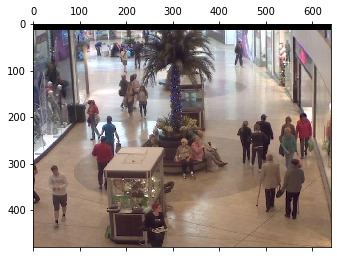

In [164]:
plt.matshow(img[rvalue], cmap='viridis')

(1, 115, 157, 3)


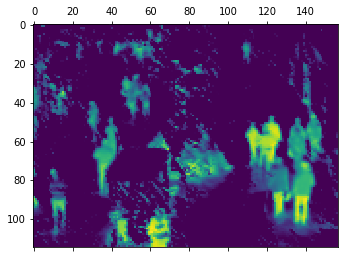

In [165]:
# Taking Fifthe layer Embeddings to represent the Convolution features of Images
first_layer_activation = a[5]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

(1, 115, 157, 3)


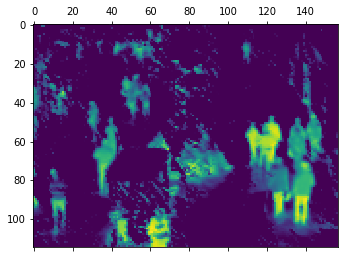

In [166]:
# Taking Fifthe layer Embeddings to represent the Convolution features of Images
first_layer_activation = a[5]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

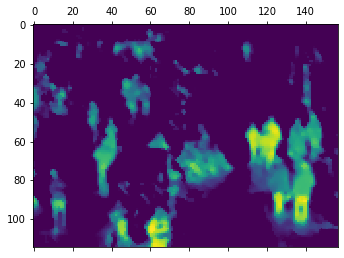

In [228]:
# Applying the Median Blur Image processing technique to reduce Noise of images
n = first_layer_activation[0, :, :, 0].copy()
n = cv2.medianBlur(n,3)
plt.matshow(n, cmap='viridis')

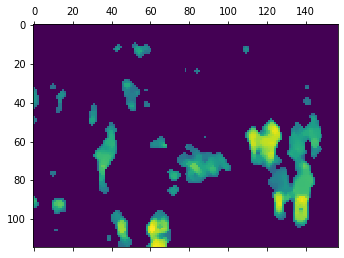

In [227]:
# Applying the Median Blur Image processing technique to reduce Noise of images
n[n<n.max()/3] = 0
n = cv2.medianBlur(n,3)
plt.matshow(n, cmap='viridis')

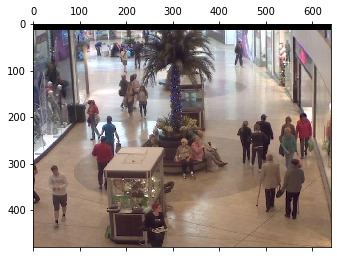

In [201]:
plt.matshow(img[rvalue], cmap='viridis')

### Contours to detect the groups

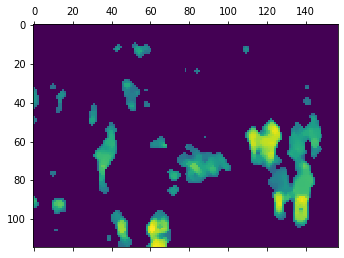

In [202]:
plt.matshow(n, cmap='viridis')

In [203]:
# Applyint Contours to detected crowd patterns
df, im1 = ApplyContours(n.copy())

In [204]:
# Adjusting the multiple contours and the area wise dilation of contours from Camera angle
df, im1, ImSegments = AdjustContours(df, img[rvalue].copy())

In [205]:
# Filter and zero padding the images to apply on the Crowd Counting model
CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])

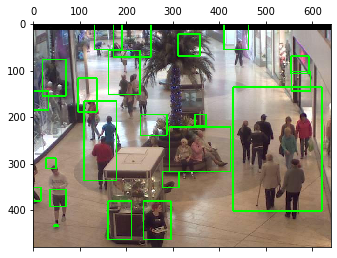

In [206]:
plt.matshow(im1, cmap='viridis')

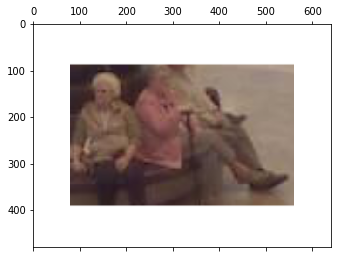

In [195]:
plt.matshow(CrowdGroups[6], cmap='viridis')

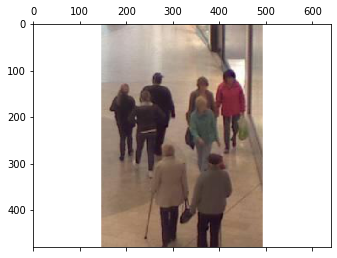

In [215]:
plt.matshow(CrowdGroups[12], cmap='viridis')

## Model -2 Number of Persons in Each group



In [91]:
def GetNoofPersons(points, row):
  coords = points[((points[:,0]>row['x']) & (points[:,0]<(row['x']+row['w']))) & ((points[:,1]>row['y']) & (points[:,1]<(row['y']+row['h'])))]
  return coords.shape[0]

def GenerateInsideData(activation_model, array, points, testing=False):
  # Buidling inbetween 6 layer model of trained model
  a = activation_model.predict(array)
  # print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

  # Taking Fifthe layer Embeddings to represent the Convolution features of Images
  first_layer_activation = a[5]
  n = first_layer_activation[0, :, :, 0].copy()
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n = cv2.medianBlur(n,3)
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n[n<n.max()/3] = 0
  n = cv2.medianBlur(n,3)

  # Applyint Contours to detected crowd patterns
  df, im1 = ApplyContours(n.copy())

  # Adjusting the multiple contours and the area wise dilation of contours from Camera angle
  df, im1, ImSegments = AdjustContours(df, img[rvalue].copy())

  # Assigning Number of persons associated with the each Cluster cropped
  df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)

  # Filter and zero padding the images to apply on the Crowd Counting model
  CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])
  if testing:
    return df, CrowdGroups, im1
  #df['Images'] = CrowdGroups
  return df, CrowdGroups

In [269]:
# Assigning Number of persons associated with the each Cluster cropped
df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)
df['Images'] = CrowdGroups

### Preparing Data for People Counting model

In [8]:
layer_outputs = [layer.output for layer in model.layers[:8]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [9]:
img = np.load('images.npy')
img1 = np.load('PreprocessImages.npy')
images_gt=np.load('images_gt.npy',allow_pickle=True)


rvalue = np.random.randint(2000)

# Picking image randomly to apply model
array = img1[rvalue][None,:]
points = images_gt[rvalue]

In [17]:
%%time
df, CG = GenerateInsideData(activation_model, array, points)

CPU times: user 120 ms, sys: 49.2 ms, total: 169 ms
Wall time: 460 ms


In [32]:
%%time
dfs = []
CGs = []
for rvalue in range(300):
  array = img1[rvalue][None,:]
  points = images_gt[rvalue]
  df, CG = GenerateInsideData(activation_model, array, points)

  dfs.append(df)
  CGs.append(CG)

CGs = np.concatenate(CGs)
dfs = pd.concat(dfs).reset_index(drop=True)

CPU times: user 26.3 s, sys: 778 ms, total: 27.1 s
Wall time: 24.5 s


In [33]:
CGs = np.concatenate(CGs)
dfs = pd.concat(dfs)

In [43]:
# Filter more zeros on noise from images
dfs = dfs[~dfs.index.isin(dfs.loc[dfs['NoofPersons'].eq(0)].iloc[:700].index)]
FilteredIndex = dfs.index
CGs = CGs[FilteredIndex]

In [55]:


def PatternRecognitionModel(input_shape):
    '''
    Pattern Recognition model consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''
    # Model
    model = Sequential()
# Convolutional
    model.add(Cropping2D(cropping=((5, 5), (0, 0)), input_shape=input_shape))
#     Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))
    model.add(Lambda(lambda x: (x / 255.0) - 0.5))
    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1),use_bias=True, 
                     kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation('relu'))
    # Fully connected
    model.add(Flatten())
    model.add(Dense(units=1164))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=50))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mae'])
    return model



# Splitting data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(CGs, dfs['NoofPersons'].values, test_size=0.2, random_state=43)
print(x_train.shape[0])
print(x_test.shape[0])


# Initializing the Convolutional model
PersonModel = PatternRecognitionModel(x_train[0].shape)

#model = PatternRecognitionModel_API(x_train[0].shape)
PersonModel.summary()




1685
422
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 470, 640, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 470, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 233, 318, 3)       228       
_________________________________________________________________
activation (Activation)      (None, 233, 318, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 115, 157, 3)       228       
_________________________________________________________________
activation_1 (Activation)    (None, 115, 157, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 78, 8) 

In [56]:
# Hyper parameters considered for model
batch_size = 10
epochs = 100
#Training  the model
PersonModel.fit(x_train, y_train, steps_per_epoch=int(np.ceil(len(x_train) / float(batch_size))), epochs=epochs, workers=4,
                    verbose=1, validation_data=(x_test, y_test), validation_steps=int(np.ceil(len(x_test) / float(batch_size))))

Epoch 1/100
169/169 [==============================] - 3s 17ms/step - loss: 4.0926 - mae: 1.3622 - val_loss: 3.7805 - val_mae: 1.4077
Epoch 2/100
169/169 [==============================] - 3s 15ms/step - loss: 2.9975 - mae: 1.1294 - val_loss: 2.3128 - val_mae: 1.0845
Epoch 3/100
169/169 [==============================] - 3s 15ms/step - loss: 1.8671 - mae: 0.9063 - val_loss: 1.6009 - val_mae: 0.8263
Epoch 4/100
169/169 [==============================] - 3s 16ms/step - loss: 1.5697 - mae: 0.8427 - val_loss: 1.6274 - val_mae: 0.8918
Epoch 5/100
169/169 [==============================] - 3s 15ms/step - loss: 1.1099 - mae: 0.7112 - val_loss: 1.4884 - val_mae: 0.8401
Epoch 6/100
169/169 [==============================] - 3s 15ms/step - loss: 0.8789 - mae: 0.6477 - val_loss: 1.3732 - val_mae: 0.7879
Epoch 7/100
169/169 [==============================] - 3s 16ms/step - loss: 0.8312 - mae: 0.6359 - val_loss: 1.4590 - val_mae: 0.7654
Epoch 8/100
169/169 [==============================] - 3s 16ms

In [66]:

# # serialize model to JSON
# model_json = PersonModel.to_json()
# with open("drive/My Drive/project/CrowdCounting/PersonModel.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# PersonModel.save_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
# print("Saved model to disk")
 


 # load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/PersonModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
PersonModel = model_from_json(loaded_model_json)
# load weights into new model
PersonModel.load_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [58]:
CGs.shape

(2107, 480, 640, 3)

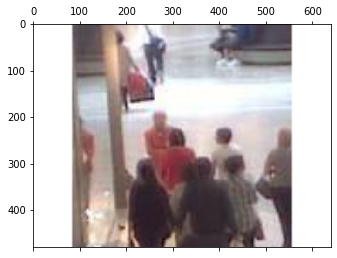

In [63]:
plt.matshow(CGs[129], cmap='viridis')

In [70]:
PersonModel.predict(CGs[129][None,:])[0][0]

9.015613

## Testing the Model Cummulatively

In [248]:
from keras.models import model_from_json
import numpy as np

def Preoprocessimage(a, ModeofImage):
  #a[np.abs(a[:,:,0]-m[:,:,0])<10] = 255
  a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255
  kernel = np.ones((2,2),np.uint8)
  b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
  b = cv2.GaussianBlur(b,(3,3),0)
  return b

def GetNoofPersons(points, row):
  coords = points[((points[:,0]>row['x']) & (points[:,0]<(row['x']+row['w']))) & ((points[:,1]>row['y']) & (points[:,1]<(row['y']+row['h'])))]
  return coords.shape[0]

def GenerateInsideData(activation_model, array, points, image, testing=False):
  # Buidling inbetween 6 layer model of trained model
  a = activation_model.predict(array)
  # print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

  # Taking Fifthe layer Embeddings to represent the Convolution features of Images
  first_layer_activation = a[5]
  n = first_layer_activation[0, :, :, 0].copy()
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n = cv2.medianBlur(n,3)
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n[n<n.max()/3] = 0
  n = cv2.medianBlur(n,3)

  # Applyint Contours to detected crowd patterns
  df, im1 = ApplyContours(n.copy())

  # Adjusting the multiple contours and the area wise dilation of contours from Camera angle
  df, im2, ImSegments = AdjustContours(df, image.copy())

  # Assigning Number of persons associated with the each Cluster cropped
  df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)

  # Filter and zero padding the images to apply on the Crowd Counting model
  CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])
  if testing:
    return df, CrowdGroups,n,im2
  #df['Images'] = CrowdGroups
  return df, CrowdGroups


def PlotGroups(im1, df1, font=0.7):
  for ind, row in df1.iterrows():
      x,y,w,h = row[['x','y','w','h']].astype(int).values
      cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(im1, 'group size - '+ str(int(row['NoofPersons'])), 
                  (x,y+20),  cv2.FONT_HERSHEY_SIMPLEX , font, (255, 0, 0), 2, cv2.LINE_AA) 
  return im1


# load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
GroupModel = model_from_json(loaded_model_json)
# load weights into new model
GroupModel.load_weights("drive/My Drive/project/CrowdCounting/model1.h5")
print("Loaded model from disk")
 
ModeofImage = np.load('drive/My Drive/project/CrowdCounting/ModeOfImage.npy')



# load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/PersonModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
PersonModel = model_from_json(loaded_model_json)
# load weights into new model
PersonModel.load_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
print("Loaded model from disk")
 

Loaded model from disk
Loaded model from disk


In [ ]:
# Downlaod data for the nyc_taxi_trip_duration challenge
!kaggle datasets download -d fmena14/crowd-counting
!unzip -qq crowd-counting.zip
# Load Data
img = np.load('images.npy')


In [256]:
# Testing on one random image
rvalue = np.random.randint(2000)
image = img[rvalue]
array = Preoprocessimage(image.copy(), ModeofImage)[None,:]

In [257]:
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in  GroupModel.layers[:12]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=GroupModel.input, outputs=layer_outputs) 

In [258]:
%%time
df, CG, n, im2 = GenerateInsideData(activation_model, array, points, image.copy(), testing=True)

CPU times: user 170 ms, sys: 2.67 ms, total: 173 ms
Wall time: 159 ms


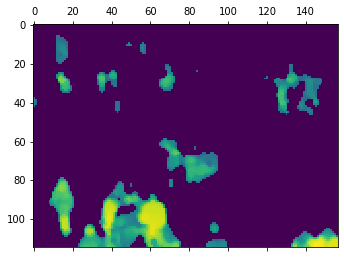

In [259]:
plt.matshow(n, cmap='viridis')

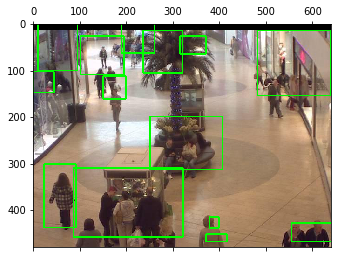

In [260]:
plt.matshow(im2, cmap='viridis')

In [261]:
df['NoofPersons'] = PersonModel.predict(CG).flatten()
df1 = df.loc[df['NoofPersons']>3]

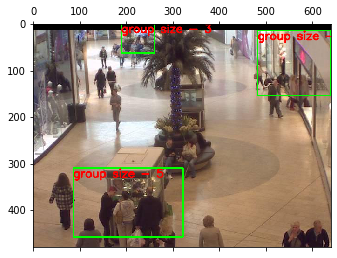

In [262]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

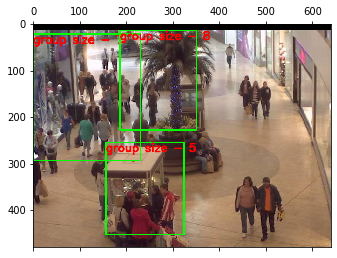

In [255]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

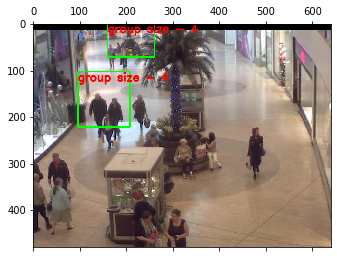

In [247]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

In [239]:
df1

,x,y,w,h,area,thr,NoofPersons
10,96,104,112,118,223.5,25,4.557463
15,160,0,101,72,28.0,40,4.771924


## DataSets explored

In [440]:
# https://github.com/gjy3035/Awesome-Crowd-Counting/blob/master/src/Datasets.md

In [460]:
# !wget http://visal.cs.cityu.edu.hk/static/downloads/ucsdpeds_vidd.zip

# !mkdir data1
# !cp ucsdpeds_vidd.zip data1/ucsdpeds_vidd.zip
# %cd data1
# !unzip -qq ucsdpeds_vidd.zip
# # import os
# # os.listdir('video/vidd')

# # WasteData
# Irregular format need to understanding time taking


In [457]:
# !wget http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/datasets/USA/
# Tooo much of data with videos 
# Wont Work

In [459]:
# !wget https://doc-14-1c-docs.googleusercontent.com/docs/securesc/pcl26q7pr82be4675798ftbc6t00rj5j/lhcs3a5e6q5orf4ebutontjd4rdq8nh0/1606979250000/15424859768005087218/10567653989436125084Z/1OZv7JvgmTAW7_E5RRTno0T9pdGK1XFv6?e=download&nonce=t8b2h8blm6vq0&user=10567653989436125084Z&hash=4al289ov8mk8aiaks6qoujco90h5nitq
# # Seq data w.r.t their convention, understanding take 2 days time

In [ ]:
n[n<0]=0
n = cv2.medianBlur(n,3)

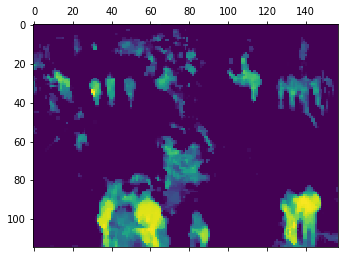

In [ ]:
plt.matshow(n, cmap='viridis')

(1, 115, 157, 8)


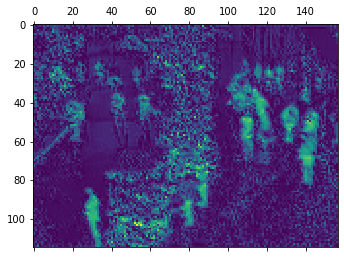

In [ ]:
#np.abs(first_layer_activation[0, :, :, 2])#*255
first_layer_activation = a[4]
print(first_layer_activation.shape)
plt.matshow(np.abs(first_layer_activation[0, :, :, 6]), cmap='viridis')

(1, 233, 318, 16)


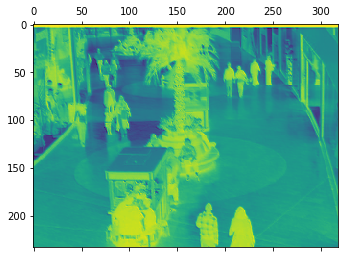

In [ ]:
first_layer_activation = a[2]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

In [1]:
# %cd data1
# !wget https://drive.google.com/file/d/1y0BoU7RIisMgj4PsCPbY02PPm4CEXaEF/view

In [6]:
ls

adc.json  images_density.npy  images.npy  labels.npy  sample_data/


In [9]:
## Load Data Set
# images=np.load('images.npy')
# images_gt=np.load('images_gt.npy',allow_pickle=True)
images_density=np.load('images_density.npy')
labels=np.load('labels.npy')

In [8]:
import numpy as np

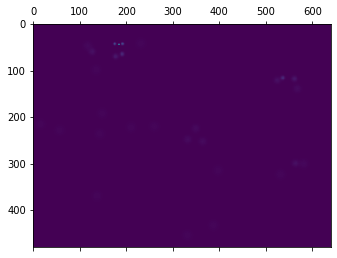

In [12]:
from matplotlib import pyplot as plt
plt.matshow(images_density[0], cmap='viridis')

In [ ]:
from IPython import display
import cv2

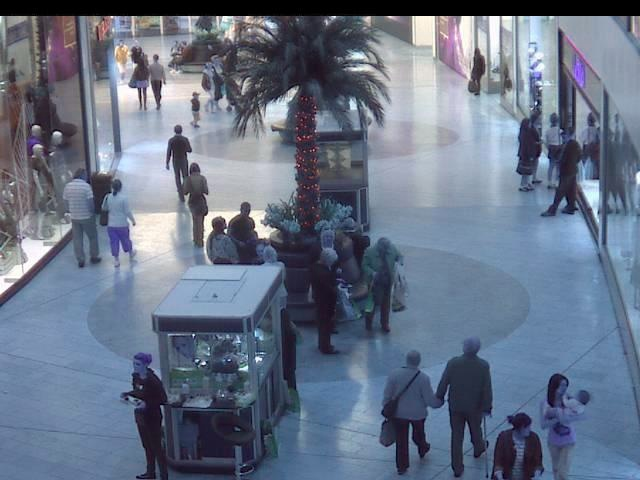

In [ ]:
cv2.imwrite('temp.jpg',img[0])
display.Image(filename='temp.jpg')

In [ ]:
import cv2 
import imutils 
   
# Initializing the HOG person 
# detector 
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
   
# Reading the Image 
image = cv2.imread('temp.jpg') 
   
# Resizing the Image 
image = imutils.resize(image, 
                       width=min(400, image.shape[1])) 
   
# Detecting all the regions in the  
# Image that has a pedestrians inside it 
(regions, _) = hog.detectMultiScale(image,  
                                    winStride=(4, 4), 
                                    padding=(4, 4), 
                                    scale=1.05) 
   
# Drawing the regions in the Image 
for (x, y, w, h) in regions: 
    cv2.rectangle(image, (x, y),  
                  (x + w, y + h),  
                  (0, 0, 255), 2) 
  
# # Showing the output Image 
# cv2.imshow("Image", image) 

cv2.imwrite('temp1.jpg', image)

True

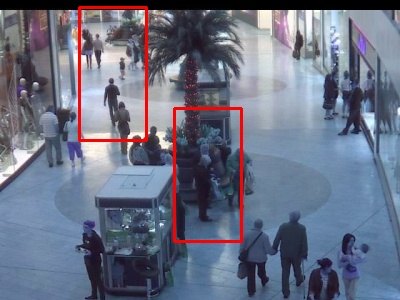

In [ ]:
display.Image(filename='temp1.jpg ')

In [ ]:
X_train, y_train, X_valid, y_valid = train_test_split(img, label_df['people'].values, random_state=42)

In [ ]:
X_train.shape

(1500, 480, 640, 3)

In [ ]:
# https://www.kaggle.com/camnugent/convolutional-neural-net-basic-tensorflow

In [ ]:
#####
# Load in the data
#####
print('loading data')
# load function from: https://www.kaggle.com/kmader/exploring-the-icebergs-with-skimage-and-keras
# b/c I didn't want to reinvent the wheel
def load_and_format(in_path):
    """ take the input data in .json format and return a df with the data and an np.array for the pictures """
    out_df = pd.read_json(in_path)
    out_images = out_df.apply(lambda c_row: [np.stack([c_row['band_1'],c_row['band_2']], -1).reshape((75,75,2))],1)
    out_images = np.stack(out_images).squeeze()
    return out_df, out_images


# train_df, train_images = load_and_format('../input/train.json')

# test_df, test_images = load_and_format('../input/test.json')

# X_train, X_valid, y_train, y_valid = train_test_split(train_images,
#                                                    train_df['is_iceberg'].as_matrix(),
#                                                    test_size = 0.3
#                                                    )
print('Train', X_train.shape, y_train.shape)
print('Validation', X_valid.shape, y_valid.shape)

loading data
Train (1500, 480, 640, 3) (500, 480, 640, 3)
Validation (1500,) (500,)


Convert data to float32
Tensorflow likes its data to be in float32, if you skip this step and pass in float64 values... it will yell at you. I don't like being yelled at so I avoid this.

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
y_valid= y_valid.astype(np.float32)

Define a reset function
This is here for iterative design purposes. If you define the neural network and don't do exactly how you want, then try to do it again without resetting the graph, then funny things can happen as tensorflow will try to patch the new onto the old. We must therefore always throw away the old!

In [ ]:
#for stability
# def reset_graph(seed=42):
#     tf.reset_default_graph()
#     tf.set_random_seed(seed)
#     np.random.seed(seed)
# reset_graph()

from tensorflow.python.framework import ops
ops.reset_default_graph()


Set necessary paramaters/hyperparamaters
For this model I'm using a slow learning rate (0.005) and a high number of epochs (2500).

The input to the network is the length * width of the image (# of pixels). The dropout is used to prevent overfitting by randomly dropping components of neural network.

In [ ]:
X_train.shape

(1500, 480, 640, 3)

In [ ]:
print('designing model')
# Training Parameters
learning_rate = 0.005
n_epochs = 2500 # changed to 2500 for a LB score of ~2.69


# Network Parameters
num_input = 480*640 #size of the images
num_classes = 2 # Binary
dropout = 0.4 # Dropout, probability to keep units

designing model


Design the convolutional neural network
Here we get to the design of the network, first set is to design the graph in tensorflow. The variables X and y below are placeholders for the actual data we will pass in to the network. Note the shape of X is (None, 75, 75, 2). The None is so that the # of rows is flexiable, the 75,75 is the pixel dimensions of the image and the 2 is because there are two channels of image data being passed in. Note y has shape=(None) because it will be a 1-D vector with one input for each row. If we had multiple classes this could be changed to shape=(None, 5) (for 5 classes).

I use the tensorflow layers API because it is easier to understand the makeup of the network and also easier to design the network.

The network used here uses an initial set of convolutional layers, followed by a pooling step and several additional fully connected layers. The second to last layer applies dropout, which we defined as 0.3. Throughout the network the rectified linear unit (ReLU) activation function(https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) is used, along with an He Kernel initializer (https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf). The Sigmoid activation function is important for the final layer as this lets us get meaningful probabilities returned from the network.

In [ ]:
X = tf.placeholder(tf.float32, shape=(None, 480, 640, 2), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")


with tf.variable_scope('ConvNet'):

    he_init = tf.contrib.layers.variance_scaling_initializer()

    # Convolution Layer with 32 filters and a kernel size of 5
    conv1 = tf.layers.conv2d(X, filters=32,  kernel_size=[5, 5], activation=tf.nn.relu)
    # Max Pooling 
    pool1 = tf.layers.max_pooling2d(conv1, pool_size=[2, 2], strides=2)

    conv2 = tf.layers.conv2d(pool1, filters=64,  kernel_size=[3,3], activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2, pool_size=[2, 2], strides=2)
    
    conv3 = tf.layers.conv2d(pool2, filters=128, kernel_size=[3,3], activation=tf.nn.relu)
    pool3 = tf.layers.max_pooling2d(conv3, pool_size=[2, 2], strides=2)

    conv4 = tf.layers.conv2d(pool3, filters=256, kernel_size=[3,3], activation=tf.nn.relu)
    pool4 = tf.layers.max_pooling2d(conv4, pool_size=[2, 2], strides=2)
    
    conv5 = tf.layers.conv2d(pool3, filters=256, kernel_size=[3,3], activation=tf.nn.relu)
    pool5 = tf.layers.max_pooling2d(conv4, pool_size=[2, 2], strides=2)

    
    conv6 = tf.layers.conv2d(pool3, filters=128, kernel_size=[3,3], activation=tf.nn.relu)
    pool6 = tf.layers.max_pooling2d(conv4, pool_size=[2, 2], strides=2)
    
    # Flatten the data to a 1-D vector for the fully connected layer
    fc1 = tf.contrib.layers.flatten(pool6)

    # Fully connected layer 
    fc2 = tf.layers.dense(fc1, 32, 
                        kernel_initializer=he_init, activation=tf.nn.relu)

    # Apply Dropout 
    fc3 = tf.layers.dropout(fc2, rate=dropout)

    logits = tf.layers.dense(fc3, num_classes, activation=tf.nn.sigmoid)

AttributeError: ignored

Define the loss function
With the network defined we next define the loss function which compares the predicted values to the actual values of the training set. The sparse_softmax_cross_entropy_with_logits function used here computes the sparse softmax cross entropy between logits and labels and the reduce_mean function is then used to compute the mean of the tensor.

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

Define the training method
Gradient descent is defined as the training method used to minimize the loss function



In [ ]:
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Define the evalutation method
This explains the evaluation method better then I can, so have a look if you're curious about how tf.nn.in_top_k() works!

https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/evaluation

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Next we initialize the network. I've commented out the saver portion, I use this when running the network locally to maintain a copy of the model after training (so we don't have to start from scratch each time). The saver, and corresponding use lines below are turned off because there is no need to save the model to memory when I run on Kaggle (you can turn them on though).

In [ ]:
init = tf.global_variables_initializer()
#saver = tf.train.Saver()

Train the model
Recall the number of epochs was defined above as 2500, so the model will be trained on the entire training set for 2500 iterations. Here I have it print the training and testing accuracy after each epoch.

Here we initiate the model and for each epoch we use sess.run() to pass the data into the model and train the network. Predictions for the train and validation data are then made and the accuracy is assessed and printed to the screen.

In [ ]:
print('training model\n')
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})   
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_valid,
                                            y: y_valid})
    
        print(epoch, "Train accuracy:", acc_train, "Validation accuracy:", acc_test)
    save_path = saver.save(sess, "./cam_iceberg_model_final.ckpt")


Prepare the test data
As we did with the training and validation data, before making predictions I convert the type of the test data to float32.

In [ ]:
#convert the test images to float32
test_images =test_images.astype(np.float32) 
test_images.shape


Make predictions¶
The last line y_pred = Z[:,1] selects the second column of the predictions because we want 'probability of iceberg' not 'probability of not iceberg' which would be column 0.

In [ ]:
print('making predictions\n')
#make external predictions on the test_dat
with tf.Session() as sess:
    saver.restore(sess, "./cam_iceberg_model_final.ckpt") # or better, use save_path
    Z = logits.eval(feed_dict={X: test_images}) #outputs switched to logits
    y_pred = Z[:,1]


Write output to file¶
Lastly we take the predictions and construct a dataframe which we output to a .csv and can then submit for evalutation!

In [ ]:
output = pd.DataFrame(test_df['id'])
output['is_iceberg'] = y_pred

output.to_csv('cam_tf_cnn.csv', index=False)

1800
200


NameError: ignored

In [ ]:
#os.listdir('../drive/My Drive/project/BioBert')
# !mv Model.zip ../drive/My\ Drive/project/BioBert/Model.zip